# ANN Model creation and testing

## Contents

1. Training data generation
2. ANN model training and testing
3. Implementation of the model in GWSNR

In [1]:
# # If you have not installed the following packages, please uncomment and run the following command:
# !pip install ler

## 1. Training data generation

* The training data is generated using [ler](https://ler.readthedocs.io/en/latest/) package.
* Data needs to be trained for each detector separately.
* I will choose 'L1' detector for this notebook with the following specified parameters:
    * Sampling frequency : 2048 Hz
    * waveform approximant : IMRPhenomXPHM
    * minimum frequency : 20.0
    * psd : aLIGO_O4_high_asd.txt from `pycbc` package

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from ler.utils import TrainingDataGenerator

In [2]:
tdg = TrainingDataGenerator(
    npool=8,  # number of processes
    verbose=False, # set it to True if you are running the code for the first time
    # GWSNR parameters
    sampling_frequency=2048.,
    waveform_approximant='IMRPhenomXPHM',  # spin-precessing waveform model
    minimum_frequency=20.,
    psds={'L1':'aLIGO_O4_high_asd.txt'}, # chosen interferometer is 'L1'. If multiple interferometers are chosen, optimal network SNR will be considered.
    spin_zero=False,
    spin_precessing=True,
    snr_method='inner_product',  # 'interpolation' or 'inner_product'
)

* `ler` package, by default, generates astrophysical signals that most likely will not be detected by the detector, i.e. low SNR signals.

* But you want your ANN model to be sensitive to the signals that near the detection threshold.

* So, I will generate most of the training data with SNR near the detection threshold.

**Note:** Increase sample size of the training data to get better accuracy in the ANN model.

In [3]:
# rerun if hanged
ler = tdg.gw_parameters_generator(
    size=10000,  # number of samples to generate
    batch_size=400000,  # reduce this number if you have memory issues
    snr_recalculation=True,  # pick SNR generated with 'interpolation'; recalculate SNR using 'inner product'
    trim_to_size=False, verbose=True,
    data_distribution_range = [0., 2., 4., 6., 8., 10., 12., 14., 16., 100.],  # equal data samples will be distributed in these ranges
    replace=False,  # set to True if you want to replace the existing data
    output_jsonfile="IMRPhenomXPHM_O4_high_asd_L1_1.json",
)


Initializing GWRATES class...

current size of the json file: 1197

total event to collect: 10000



100%|████████████████████████████████████████████████████████████| 369/369 [00:00<00:00, 378.22it/s]


Collected number of events: 1485


100%|████████████████████████████████████████████████████████████| 378/378 [00:00<00:00, 398.39it/s]


Collected number of events: 1773


100%|████████████████████████████████████████████████████████████| 314/314 [00:00<00:00, 354.46it/s]


Collected number of events: 2043


100%|████████████████████████████████████████████████████████████| 423/423 [00:01<00:00, 399.50it/s]


Collected number of events: 2412


100%|████████████████████████████████████████████████████████████| 338/338 [00:00<00:00, 362.23it/s]


Collected number of events: 2691


100%|████████████████████████████████████████████████████████████| 454/454 [00:01<00:00, 409.53it/s]


Collected number of events: 3006


100%|████████████████████████████████████████████████████████████| 449/449 [00:01<00:00, 400.76it/s]


Collected number of events: 3348


100%|████████████████████████████████████████████████████████████| 279/279 [00:00<00:00, 348.12it/s]


Collected number of events: 3582


100%|████████████████████████████████████████████████████████████| 396/396 [00:01<00:00, 374.89it/s]


Collected number of events: 3915


100%|████████████████████████████████████████████████████████████| 387/387 [00:00<00:00, 402.89it/s]


Collected number of events: 4257


100%|████████████████████████████████████████████████████████████| 395/395 [00:01<00:00, 383.34it/s]


Collected number of events: 4545


100%|████████████████████████████████████████████████████████████| 377/377 [00:01<00:00, 366.50it/s]


Collected number of events: 4833


100%|████████████████████████████████████████████████████████████| 377/377 [00:00<00:00, 389.85it/s]


Collected number of events: 5166


100%|████████████████████████████████████████████████████████████| 396/396 [00:01<00:00, 389.59it/s]


Collected number of events: 5472


100%|████████████████████████████████████████████████████████████| 405/405 [00:01<00:00, 378.78it/s]


Collected number of events: 5769


100%|████████████████████████████████████████████████████████████| 387/387 [00:01<00:00, 382.65it/s]


Collected number of events: 6138


100%|████████████████████████████████████████████████████████████| 259/259 [00:00<00:00, 339.38it/s]


Collected number of events: 6336


100%|████████████████████████████████████████████████████████████| 315/315 [00:00<00:00, 353.23it/s]


Collected number of events: 6588


100%|████████████████████████████████████████████████████████████| 378/378 [00:01<00:00, 363.57it/s]


Collected number of events: 6849


100%|████████████████████████████████████████████████████████████| 297/297 [00:00<00:00, 342.76it/s]


Collected number of events: 7092


100%|████████████████████████████████████████████████████████████| 305/305 [00:00<00:00, 361.80it/s]


Collected number of events: 7317


100%|████████████████████████████████████████████████████████████| 332/332 [00:00<00:00, 376.09it/s]


Collected number of events: 7560


100%|████████████████████████████████████████████████████████████| 377/377 [00:00<00:00, 388.24it/s]


Collected number of events: 7875


100%|████████████████████████████████████████████████████████████| 306/306 [00:00<00:00, 348.02it/s]


Collected number of events: 8127


100%|████████████████████████████████████████████████████████████| 421/421 [00:01<00:00, 394.64it/s]


Collected number of events: 8424


100%|████████████████████████████████████████████████████████████| 377/377 [00:01<00:00, 371.58it/s]


Collected number of events: 8775


100%|████████████████████████████████████████████████████████████| 432/432 [00:01<00:00, 393.02it/s]


Collected number of events: 9144


100%|████████████████████████████████████████████████████████████| 304/304 [00:00<00:00, 334.92it/s]


Collected number of events: 9396


100%|████████████████████████████████████████████████████████████| 466/466 [00:01<00:00, 438.22it/s]


Collected number of events: 9765


100%|████████████████████████████████████████████████████████████| 369/369 [00:00<00:00, 390.73it/s]


Collected number of events: 10098
final size: 10098

json file saved at: ./ler_data/IMRPhenomXPHM_O4_high_asd_L1_1.json



In [4]:
# might take 2mins~3mins
# 10 mins 0.7 s, 10000 samples with 8 processes and batch_size=200000  
tdg.gw_parameters_generator(
    size=5000, 
    batch_size=200000, 
    snr_recalculation=True,
    trim_to_size=False, verbose=True, 
    data_distribution_range = [4., 8., 12.], # equal data samples will be distributed in these ranges
    replace=False,
    output_jsonfile="IMRPhenomXPHM_O4_high_asd_L1_2.json",
)


Initializing GWRATES class...

total event to collect: 5000



100%|████████████████████████████████████████████████████████████| 438/438 [00:01<00:00, 426.01it/s]


Collected number of events: 376


100%|████████████████████████████████████████████████████████████| 494/494 [00:01<00:00, 444.68it/s]


Collected number of events: 816


100%|████████████████████████████████████████████████████████████| 480/480 [00:01<00:00, 417.20it/s]


Collected number of events: 1224


100%|████████████████████████████████████████████████████████████| 464/464 [00:01<00:00, 409.93it/s]


Collected number of events: 1630


100%|████████████████████████████████████████████████████████████| 482/482 [00:01<00:00, 392.78it/s]


Collected number of events: 2060


100%|████████████████████████████████████████████████████████████| 470/470 [00:01<00:00, 387.19it/s]


Collected number of events: 2460


100%|████████████████████████████████████████████████████████████| 472/472 [00:01<00:00, 412.21it/s]


Collected number of events: 2856


100%|████████████████████████████████████████████████████████████| 470/470 [00:01<00:00, 423.07it/s]


Collected number of events: 3272


100%|████████████████████████████████████████████████████████████| 530/530 [00:01<00:00, 430.88it/s]


Collected number of events: 3712


100%|████████████████████████████████████████████████████████████| 438/438 [00:01<00:00, 405.48it/s]


Collected number of events: 4092


100%|████████████████████████████████████████████████████████████| 486/486 [00:01<00:00, 419.60it/s]


Collected number of events: 4516


100%|████████████████████████████████████████████████████████████| 466/466 [00:01<00:00, 379.73it/s]


Collected number of events: 4922


100%|████████████████████████████████████████████████████████████| 498/498 [00:01<00:00, 441.36it/s]


Collected number of events: 5362
final size: 5362

json file saved at: ./ler_data/IMRPhenomXPHM_O4_high_asd_L1_2.json



In [5]:
tdg.gw_parameters_generator(
    size=10000,
    batch_size=10000, 
    snr_recalculation=True,
    trim_to_size=False, 
    verbose=False, 
    data_distribution_range = None,
    replace=True,
    output_jsonfile="IMRPhenomXPHM_O4_high_asd_L1_3.json",
)


Initializing GWRATES class...

total event to collect: 10000

final size: 10000

json file saved at: ./ler_data/IMRPhenomXPHM_O4_high_asd_L1_3.json



### Additional random samples

In [6]:
from gwsnr import GWSNR
import numpy as np

gwsnr = GWSNR(
    npool=8,  # number of processes
    # GWSNR parameters
    sampling_frequency=2048.,
    waveform_approximant='IMRPhenomXPHM',  # spin-precessing waveform model
    minimum_frequency=20.,
    psds={'L1':'aLIGO_O4_high_asd.txt'}, # chosen interferometer is 'L1'. If multiple network SNR will be considered.
    snr_method='inner_product',  # 'interpolation' or 'inner_product'
)


Initializing GWSNR class...

Intel processor has trouble allocating memory when the data is huge. So, by default for IMRPhenomXPHM, duration_max = 64.0. Otherwise, set to some max value like duration_max = 600.0 (10 mins)

Chosen GWSNR initialization parameters:

npool:  8
snr type:  inner_product
waveform approximant:  IMRPhenomXPHM
sampling frequency:  2048.0
minimum frequency (fmin):  20.0
mtot=mass1+mass2
min(mtot):  9.96
max(mtot) (with the given fmin=20.0): 235.0
detectors:  ['L1']
psds:  [PowerSpectralDensity(psd_file='None', asd_file='/Users/phurailatpamhemantakumar/anaconda3/envs/ler/lib/python3.10/site-packages/bilby/gw/detector/noise_curves/aLIGO_O4_high_asd.txt')]




In [7]:
# gerneral case, random parameters
np.random.seed(64)
nsamples = 50000
mtot = np.random.uniform(2*4.98, 2*112.5,nsamples)
mass_ratio = np.random.uniform(0.2,1,size=nsamples)
param_dict = dict(
    # convert to component masses
    mass_1 = mtot / (1 + mass_ratio),
    mass_2 = mtot * mass_ratio / (1 + mass_ratio),
    # Fix luminosity distance
    luminosity_distance = np.random.uniform(40, 10000, size=nsamples),  # Random luminosity distance between 40 and 10000 Mpc
    # Randomly sample everything else:
    theta_jn = np.random.uniform(0,2*np.pi, size=nsamples),
    ra = np.random.uniform(0,2*np.pi, size=nsamples), 
    dec = np.random.uniform(-np.pi/2,np.pi/2, size=nsamples), 
    psi = np.random.uniform(0,2*np.pi, size=nsamples),
    phase = np.random.uniform(0,2*np.pi, size=nsamples),
    geocent_time = 1246527224.169434*np.ones(nsamples),
    # spin zero
    a_1 = np.random.uniform(0.0,0.8, size=nsamples),
    a_2 = np.random.uniform(0.0,0.8, size=nsamples),
    tilt_1 = np.random.uniform(0, np.pi, size=nsamples),  # tilt angle of the primary black hole in radians
    tilt_2 = np.random.uniform(0, np.pi, size=nsamples),
    phi_12 = np.random.uniform(0, 2*np.pi, size=nsamples),  # Relative angle between the primary and secondary spin of the binary in radians
    phi_jl = np.random.uniform(0, 2*np.pi, size=nsamples),  # Angle between the total angular momentum and the orbital angular momentum in radians
)

snrs_ = gwsnr.snr(gw_param_dict=param_dict)
# time: 0.2 s for 50000 samples with 8 processes

solving SNR with inner product


100%|███████████████████████████████████████████████████████| 50000/50000 [00:40<00:00, 1247.30it/s]


In [8]:
param_dict.update(snrs_)
from gwsnr.utils import append_json
append_json(
    file_name="ler_data/IMRPhenomXPHM_O4_high_asd_L1_4.json", 
    new_dictionary =param_dict,
    replace=True,  # set to True if you want to replace the existing data
);

### Combine all the data files into one

## L1 detector

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from ler.utils import TrainingDataGenerator

tdg = TrainingDataGenerator()
tdg.combine_dicts(
    file_name_list=["IMRPhenomXPHM_O4_high_asd_L1_1.json", "IMRPhenomXPHM_O4_high_asd_L1_2.json", "IMRPhenomXPHM_O4_high_asd_L1_3.json", "IMRPhenomXPHM_O4_high_asd_L1_4.json"],
    detector='L1',
    output_jsonfile="IMRPhenomXPHM_O4_high_asd_L1.json",
)

json file saved at: ./ler_data/IMRPhenomXPHM_O4_high_asd_L1.json



In [10]:
# from gwsnr.utils import get_param_from_json
# test1 = get_param_from_json("./ler_data/IMRPhenomXPHM_O4_high_asd_L1.json")

# snr = np.array(test1['L1'])
# print(f"Number of samples: {len(snr)}")

# plt.figure(figsize=[4,4])
# plt.hist(snr, bins=100, density=True, alpha=0.5, color='b', histtype='step', label='L1')
# plt.xlim([0, 40])
# plt.xlabel('Optimal SNR')
# plt.ylabel('Density')
# plt.legend()
# plt.show()

### ANN model training and testing

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from gwsnr.ann import ANNModelGenerator

In [12]:
amg = ANNModelGenerator(
    directory='./ann_data',
    npool=8,
    gwsnr_verbose=False,
    snr_th=8.0,
    waveform_approximant="IMRPhenomXPHM",
    psds={'L1': 'aLIGO_O4_high_asd.txt'},  
)


Initializing GWSNR class...

Intel processor has trouble allocating memory when the data is huge. So, by default for IMRPhenomXPHM, duration_max = 64.0. Otherwise, set to some max value like duration_max = 600.0 (10 mins)
Interpolator will be loaded for L1 detector from ./interpolator_pickle/L1/partialSNR_dict_1.pickle




In [13]:
amg.ann_model_training(
    gw_param_dict='ler_data/IMRPhenomXPHM_O4_high_asd_L1.json', # you can also get the dict from a json file first
    randomize=True,
    test_size=0.1,
    random_state=42,
    num_nodes_list = [5, 32, 32, 1],
    activation_fn_list = ['relu', 'relu', 'sigmoid', 'linear'],
    optimizer='adam',
    loss='mean_squared_error',
    metrics=['accuracy'],
    batch_size=32,
    epochs=100,
    error_adjustment_snr_range=[2,14],
    ann_file_name = 'ann_model_L1.h5',
    scaler_file_name = 'scaler_L1.pkl',
    error_adjustment_file_name='error_adjustment_L1.json',
    ann_path_dict_file_name='ann_path_dict.json',
)

# # Uncomment the following, if you have already trained the model
# # load the trained model
# amg.load_model_scaler_error(
#     ann_file_name='ann_model_L1.h5', 
#     scaler_file_name='scaler_L1.pkl',
#     error_adjustment_file_name='error_adjustment_L1.json',
# )

Epoch 1/100
2123/2123 ━━━━━━━━━━━━━━━━━━━━ 1s 309us/step - accuracy: 7.4186e-04 - loss: 1195.4056
Epoch 2/100
2123/2123 ━━━━━━━━━━━━━━━━━━━━ 1s 303us/step - accuracy: 3.7843e-04 - loss: 786.9496
Epoch 3/100
2123/2123 ━━━━━━━━━━━━━━━━━━━━ 1s 338us/step - accuracy: 5.5559e-04 - loss: 773.3979
Epoch 4/100
2123/2123 ━━━━━━━━━━━━━━━━━━━━ 1s 312us/step - accuracy: 4.7510e-04 - loss: 870.4972
Epoch 5/100
2123/2123 ━━━━━━━━━━━━━━━━━━━━ 1s 302us/step - accuracy: 5.0608e-04 - loss: 669.6340
Epoch 6/100
2123/2123 ━━━━━━━━━━━━━━━━━━━━ 1s 340us/step - accuracy: 2.4172e-04 - loss: 599.0781
Epoch 7/100
2123/2123 ━━━━━━━━━━━━━━━━━━━━ 1s 296us/step - accuracy: 1.1708e-04 - loss: 615.2960
Epoch 8/100
2123/2123 ━━━━━━━━━━━━━━━━━━━━ 1s 296us/step - accuracy: 4.0820e-04 - loss: 504.8292
Epoch 9/100
2123/2123 ━━━━━━━━━━━━━━━━━━━━ 1s 325us/step - accuracy: 3.1350e-04 - loss: 473.1070
Epoch 10/100
2123/2123 ━━━━━━━━━━━━━━━━━━━━ 1s 318us/step - accuracy: 4.6338e-04 - loss: 455.0616
Epoch 11/100
2123/2123 ━━━━━

In [14]:
amg.pdet_error()

236/236 ━━━━━━━━━━━━━━━━━━━━ 0s 242us/step
Error: 3.45%


(3.445534057778956,
 array([14.857255 ,  0.5539622,  2.7361565, ..., 12.17969  ,
        30.18567  , 30.088642 ], dtype=float32),
 array([14.48240752,  0.67263087,  3.5234792 , ..., 12.18434598,
        30.22166581, 30.23929325]))

In [15]:
amg.pdet_confusion_matrix()

236/236 ━━━━━━━━━━━━━━━━━━━━ 0s 243us/step
[[5338   85]
 [ 195 1928]]
Accuracy: 96.289%


(array([[5338,   85],
        [ 195, 1928]]),
 96.28942486085343,
 array([ True, False, False, ...,  True,  True,  True]),
 array([ True, False, False, ...,  True,  True,  True]))

2359/2359 ━━━━━━━━━━━━━━━━━━━━ 1s 213us/step


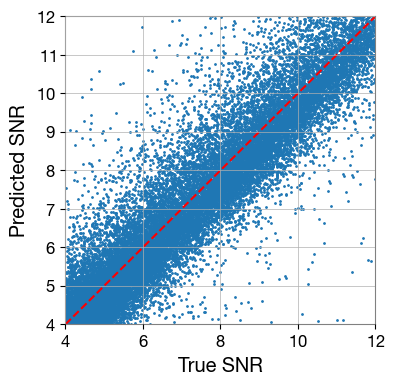

In [16]:
# predicted snr
pred_snr= amg.predict_snr(gw_param_dict='ler_data/IMRPhenomXPHM_O4_high_asd_L1.json')
# true snr
true_snr = amg.get_parameters(gw_param_dict='ler_data/IMRPhenomXPHM_O4_high_asd_L1.json')['L1']
# select only snr between 4 and 12
snr_min = 4
snr_max = 12
mask = (true_snr >= snr_min) & (true_snr <= snr_max)
true_snr = true_snr[mask]
pred_snr = pred_snr[mask]

# plot the predicted snr vs true snr
plt.figure(figsize=[4,4])
plt.scatter(true_snr, pred_snr, s=1)
snr_lim = [np.min([true_snr, true_snr]), np.max([true_snr, true_snr])]
plt.plot(snr_lim, snr_lim, 'r--')
plt.xlabel('True SNR')
plt.ylabel('Predicted SNR')
plt.xlim([snr_min, snr_max])
plt.ylim([snr_min, snr_max])
plt.show()

In [17]:
# use the following function to predict the pdet
pred_pdet = amg.predict_pdet(gw_param_dict='ler_data/IMRPhenomXPHM_O4_high_asd_L1.json', snr_threshold=8.0)

true_snr = amg.get_parameters(gw_param_dict='ler_data/IMRPhenomXPHM_O4_high_asd_L1.json')['L1']
# true pdet
true_pdet = np.array([1 if snr >= 8.0 else 0 for snr in true_snr])

from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(true_pdet, pred_pdet)
print(cm)

acc = accuracy_score(true_pdet, pred_pdet)
print(acc)


2359/2359 ━━━━━━━━━━━━━━━━━━━━ 1s 222us/step
[[53130   947]
 [ 1464 19919]]
0.9680492976411343


## 3. Implementation of the ANN model in GWSNR

Generate new astrophysical data and test the model on it using GWSNR class.

In [18]:
from ler.utils import TrainingDataGenerator

# generate some new data
tdg = TrainingDataGenerator(
    npool=4,
    verbose=False, 
    # GWSNR parameters
    sampling_frequency=2048,
    waveform_approximant='IMRPhenomXPHM',
    psds={'L1': 'aLIGO_O4_high_asd.txt'},  
    minimum_frequency=20,
    spin_zero=False,
    spin_precessing=True,
    snr_method='inner_product',
)

tdg.gw_parameters_generator(
    size=20000, 
    batch_size=20000, 
    snr_recalculation=False,
    trim_to_size=False, 
    verbose=True, 
    data_distribution_range = None, 
    replace=False,
    output_jsonfile="IMRPhenomXPHM_O4_high_asd_L1_5.json",
)


Initializing GWRATES class...

total event to collect: 20000



100%|████████████████████████████████████████████████████████| 19507/19507 [00:26<00:00, 724.89it/s]


Collected number of events: 20000
final size: 20000

json file saved at: ./ler_data/IMRPhenomXPHM_O4_high_asd_L1_5.json



* using GWSNR class, with the trained ANN model, you can generate SNR of the astrophysical GW signal parameters

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from gwsnr import GWSNR

gwsnr = GWSNR(
    snr_method='ann',
    npool=8,  # number of processes
    waveform_approximant="IMRPhenomXPHM",
    psds={'L1': 'aLIGO_O4_high_asd.txt'},
    ann_path_dict='./ann_data/ann_path_dict.json',
)


Initializing GWSNR class...

Intel processor has trouble allocating memory when the data is huge. So, by default for IMRPhenomXPHM, duration_max = 64.0. Otherwise, set to some max value like duration_max = 600.0 (10 mins)
ANN model and scaler path is given. Using the given path.
ANN model for L1 is loaded from ./ann_data/ann_model_L1.h5.
ANN scaler for L1 is loaded from ./ann_data/scaler_L1.pkl.
ANN error_adjustment for L1 is loaded from ./ann_data/error_adjustment_L1.json.
Interpolator will be loaded for L1 detector from ./interpolator_pickle/L1/partialSNR_dict_1.pickle

Chosen GWSNR initialization parameters:

npool:  8
snr type:  ann
waveform approximant:  IMRPhenomXPHM
sampling frequency:  2048.0
minimum frequency (fmin):  20.0
mtot=mass1+mass2
min(mtot):  9.96
max(mtot) (with the given fmin=20.0): 235.0
detectors:  ['L1']
psds:  [PowerSpectralDensity(psd_file='None', asd_file='/Users/phurailatpamhemantakumar/anaconda3/envs/ler/lib/python3.10/site-packages/bilby/gw/detector/noise_

In [26]:
# predicted snr, using ANN model 
pred_snr = gwsnr.snr_with_ann(gw_param_dict='./ler_data/IMRPhenomXPHM_O4_high_asd_L1_5.json')['L1']#['snr_net']

In [27]:
from gwsnr.utils import get_param_from_json
true_snr = get_param_from_json('./ler_data/IMRPhenomXPHM_O4_high_asd_L1_5.json')['L1']#['snr_net']

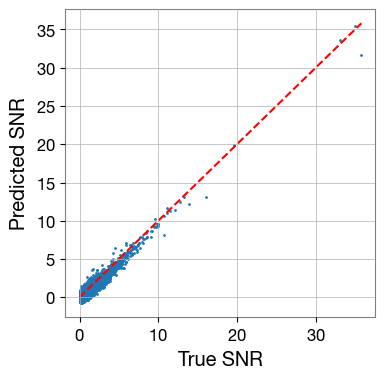

In [28]:
# select only snr between 4 and 12
# snr_min = 4
# snr_max = 12
# mask = (true_snr >= snr_min) & (true_snr <= snr_max)
# true_snr = true_snr[mask]
# pred_snr = pred_snr[mask]

# plot the predicted snr vs true snr
plt.figure(figsize=[4,4])
plt.scatter(true_snr, pred_snr, s=1)
snr_lim = [np.min([true_snr, true_snr]), np.max([true_snr, true_snr])]
plt.plot(snr_lim, snr_lim, 'r--')
plt.xlabel('True SNR')
plt.ylabel('Predicted SNR')
# plt.xlim([snr_min, snr_max])
# plt.ylim([snr_min, snr_max])
plt.show()

In [29]:
# use the following function to predict the pdet
pred_pdet = np.array([1 if snr >= 8.0 else 0 for snr in pred_snr])
# true pdet
true_pdet = np.array([1 if snr >= 8.0 else 0 for snr in true_snr])

from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(true_pdet, pred_pdet)
print(cm)

acc = accuracy_score(true_pdet, pred_pdet)
print(acc)

[[19966     0]
 [    7    27]]
0.99965
